In [78]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.models import Model
from keras import backend as K

In [66]:
# global params
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [67]:
# normalize train data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [68]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [69]:
inputs = Input(shape=(28,28,1))
x = Conv2D(24,kernel_size=(3,3),padding='same',activation="relu")(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(48, (3, 3), padding='same',activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), padding='same',activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
output = Dense(num_classes,activation="softmax")(x)

model = Model(inputs,output)


In [70]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [71]:
train_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 93us/step - loss: 2.3054 - accuracy: 0.1095 - val_loss: 2.3006 - val_accuracy: 0.1017
Epoch 2/12
60000/60000 [==============================] - 5s 80us/step - loss: 2.2963 - accuracy: 0.1160 - val_loss: 2.2920 - val_accuracy: 0.1022
Epoch 3/12
60000/60000 [==============================] - 5s 79us/step - loss: 2.2884 - accuracy: 0.1203 - val_loss: 2.2843 - val_accuracy: 0.1033
Epoch 4/12
60000/60000 [==============================] - 5s 79us/step - loss: 2.2812 - accuracy: 0.1263 - val_loss: 2.2766 - val_accuracy: 0.1061
Epoch 5/12
60000/60000 [==============================] - 5s 80us/step - loss: 2.2728 - accuracy: 0.1348 - val_loss: 2.2685 - val_accuracy: 0.1114
Epoch 6/12
60000/60000 [==============================] - 5s 79us/step - loss: 2.2648 - accuracy: 0.1470 - val_loss: 2.2597 - val_accuracy: 0.1228
Epoch 7/12
60000/60000 [==============================] - 5s 79us/st

In [72]:
test_history = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', test_history[0])
print('Test accuracy:', test_history[1])

Test loss: 2.1709128578186037
Test accuracy: 0.37290000915527344


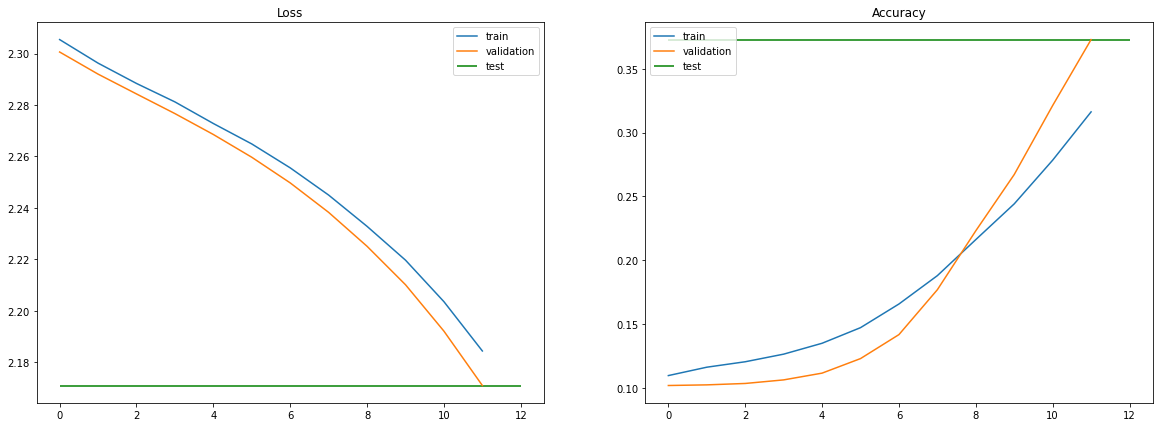

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

ax[0].plot(train_history.history["loss"], label="train")
ax[0].plot(train_history.history["val_loss"], label="validation")
ax[0].hlines(
    y=test_history[0],
    xmin=0,
    xmax=len(train_history.history["loss"]),
    colors="green",
    label="test"
)
ax[0].legend(loc=0)
ax[0].set_title("Loss")

ax[1].plot(train_history.history["accuracy"], label="train")
ax[1].plot(train_history.history["val_accuracy"], label="validation")
ax[1].hlines(
    y=test_history[1],
    xmin=0,
    xmax=len(train_history.history["loss"]),
    colors="green",
    label="test"
)
ax[1].legend(loc=0)
ax[1].set_title("Accuracy")

plt.show()

In [75]:
img = x_test[1].reshape(1,28,28,1)
layer_outputs = [layer.output for layer in model.layers[1:7]]

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


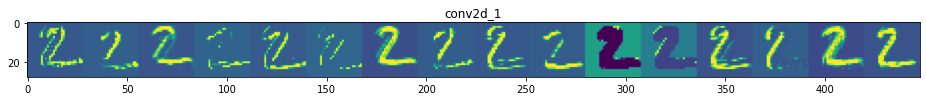

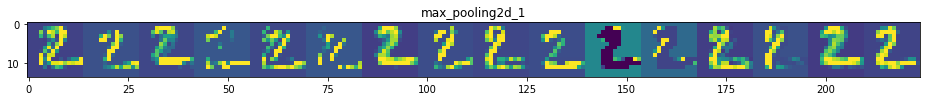

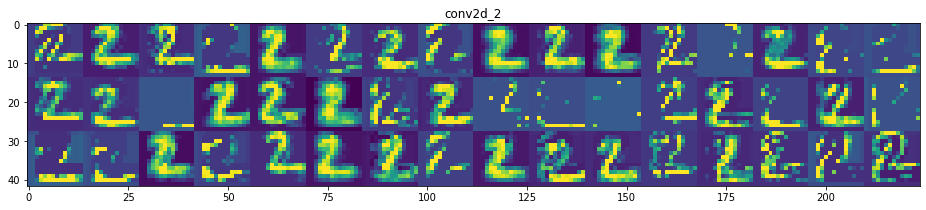

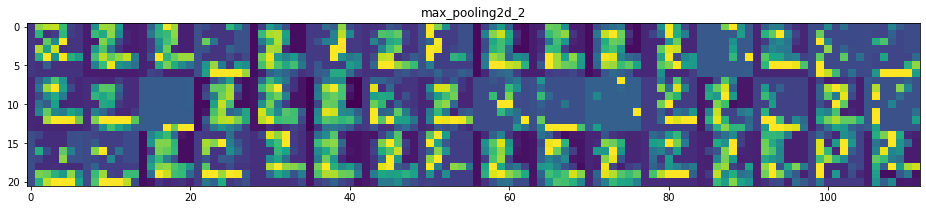

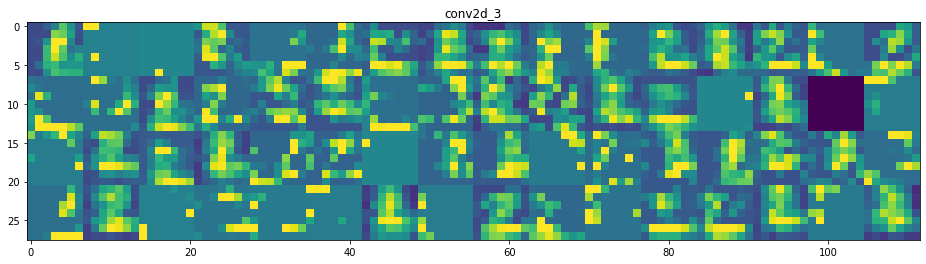

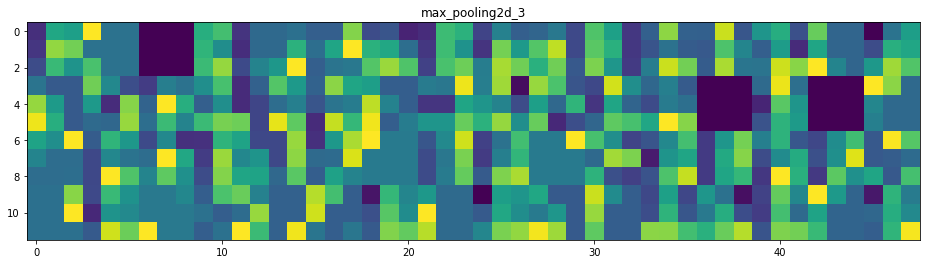

In [79]:
images_per_row = 16
layer_names = []

for layer in model.layers[1:7]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                            row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    print(plt)